# Week 12 Practice

About The Data
We'll be using the Customer Dataset from kaggle for this lab, but feel free to follow along with your own dataset. The dataset
contains the following attributes:
CustomerID
Genre
Age
AnnualIncome(k$)
Spending_Score
Our goal is to group/cluster these customers.
Note: This is the same data as week 10 lab.
DBSCAN vs. K‑Means
K‑Means clustering may cluster loosely related observations together. Every observation becomes a part of some cluster
eventually, even if the observations are scattered far away in the vector space. Since clusters depend on the mean value of cluster
elements, each data point plays a role in forming the clusters. A slight change in data points might affect the clustering outcome.
This problem is greatly reduced in DBSCAN due to the way clusters are formed. This is usually not a big problem unless we come
across some odd shape data.
Another challenge with k‑means is that you need to specify the number of clusters (“k”) in order to use it. Most of the time, we
won’t know what a reasonable k value is from the start.
What’s nice about DBSCAN is that you don’t have to specify the number of clusters to use it. All you need is a function to calculate
the distance between values and some guidance for what amount of distance is considered “close”. DBSCAN also produces more
reasonable results than k‑means across a variety of different distributions. The below figure illustrates the fact:
How The Algorithm Creates Clusters
The algorithm start by picking a point x from your dataset at random and assign it to a cluster 1. Then it counts how many points
are located within the ε (epsilon) distance from x. If this quantity is greater than or equal to minPoints (n), then we consider it as a
core point. Then it will pull out all these ε‑neighbours to the same cluster 1. It will then examine each member of cluster 1 and find
their respective ε‑neighbours. If some member of cluster 1 has n or more ε‑neighbours, it will expand cluster 1 by adding those ε‑
neighbours to the cluster. It will continue expanding cluster 1 until there are no more examples to put in it. In the latter case, it will
pick another point from the dataset not belonging to any cluster and put it to cluster 2. It will continue like this until all examples
either belong to some cluster or are marked as outliers.
There are three types of points after the DBSCAN clustering is complete:
Core: This is a point that has at least minPoints points within distance ε from itself.
Border: This is a point that has at least one Core point at a distance ε.
Noise: This is a point that is neither a Core nor a Border. And it has less than minPoints points within distance ε from itself

### Implementation

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [57]:
customer_df = pd.read_csv('customers.csv')
customer_df.drop(['CustomerID'], axis=1, inplace=True)
customer_df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### Different example

In [58]:
# Load the Iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [59]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Genre               200 non-null    object
 1   Age                 200 non-null    int64 
 2   Annual_Income_(k$)  200 non-null    int64 
 3   Spending_Score      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


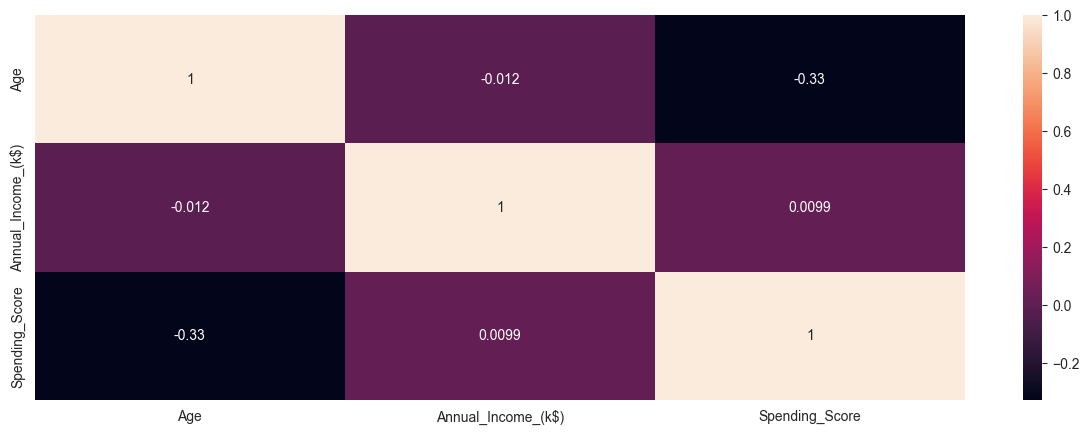

In [60]:
sns.heatmap(customer_df.select_dtypes(include=['number']).corr(), annot=True)
plt.show()


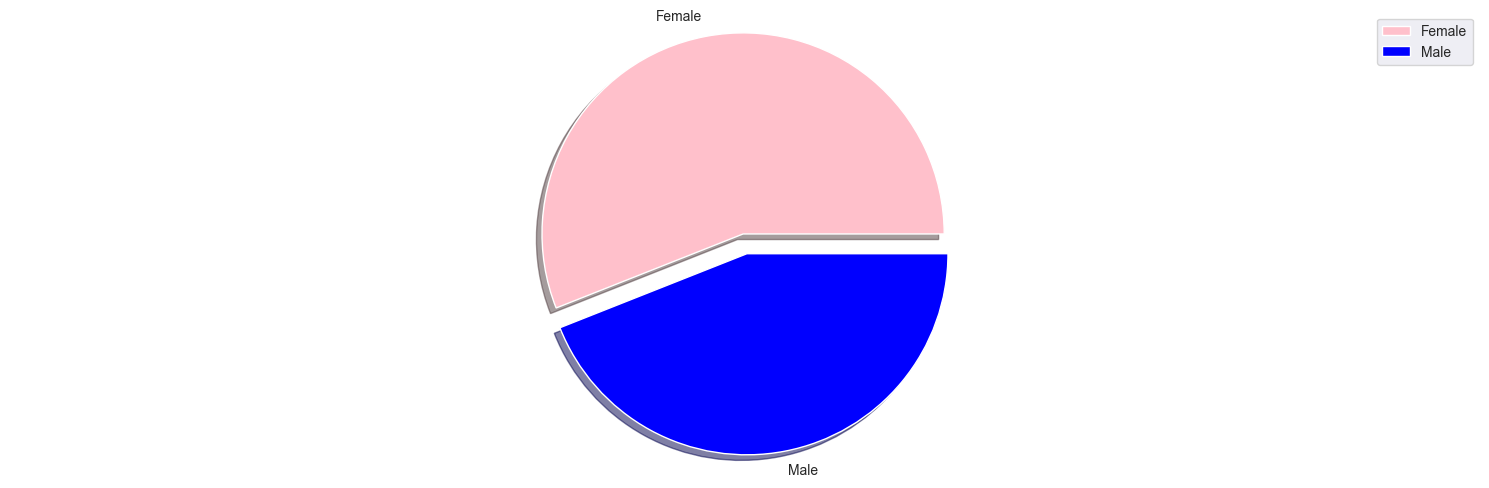

In [61]:
plt.pie(customer_df['Genre'].value_counts(), labels=['Female','Male'], colors=['Pink','Blue'], shadow=True,
explode=[0,0.1])
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()

### Different example

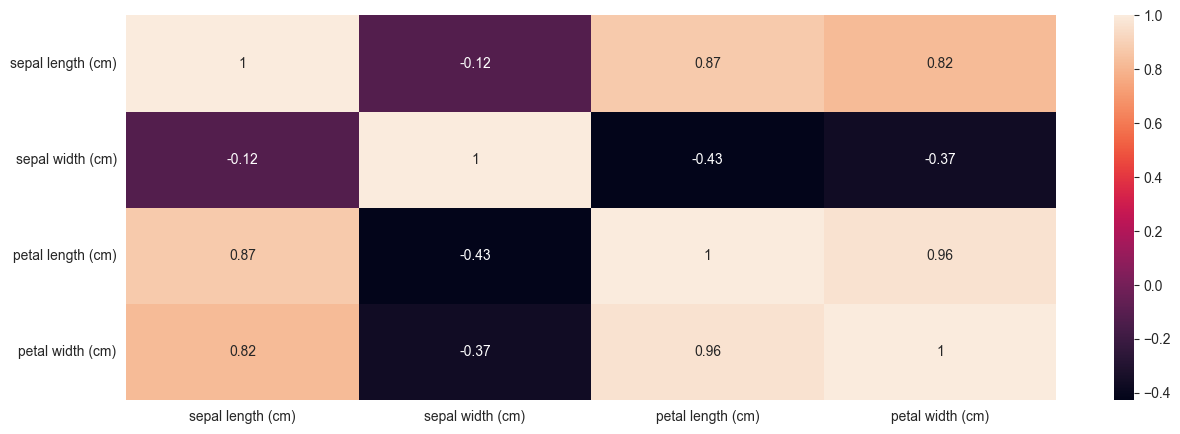

In [71]:
sns.heatmap(iris_df.select_dtypes(include=['number']).corr(), annot=True)
plt.show()

In [62]:
# Saving only Spending_Score and income values into X.
X = customer_df.iloc[:, [2, 3]].values

In [63]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=3, min_samples=4, metric='euclidean')
db.fit(X)

DBSCAN(eps=3, min_samples=4)

In [64]:
db.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

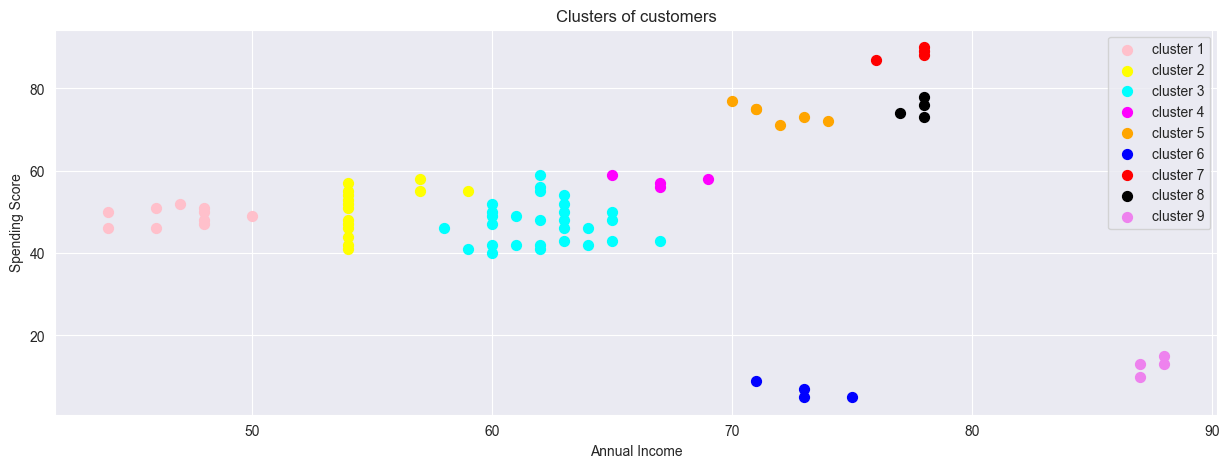

In [65]:
y_preds = db.fit_predict(X)
plt.scatter(X[y_preds == 0, 0], X[y_preds == 0, 1], s = 50, c = 'pink', label='cluster 1')
plt.scatter(X[y_preds == 1, 0], X[y_preds == 1, 1], s = 50, c = 'yellow', label='cluster 2')
plt.scatter(X[y_preds == 2, 0], X[y_preds == 2, 1], s = 50, c = 'cyan', label='cluster 3')
plt.scatter(X[y_preds == 3, 0], X[y_preds == 3, 1], s = 50, c = 'magenta', label='cluster 4')
plt.scatter(X[y_preds == 4, 0], X[y_preds == 4, 1], s = 50, c = 'orange', label='cluster 5')
plt.scatter(X[y_preds == 5, 0], X[y_preds == 5, 1], s = 50, c = 'blue', label='cluster 6')
plt.scatter(X[y_preds == 6, 0], X[y_preds == 6, 1], s = 50, c = 'red', label='cluster 7')
plt.scatter(X[y_preds == 7, 0], X[y_preds == 7, 1], s = 50, c = 'black', label='cluster 8')
plt.scatter(X[y_preds == 8, 0], X[y_preds == 8, 1], s = 50, c = 'violet', label='cluster 9')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

### Different example using the iris dataset

In [66]:
# Standardize the data
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df)

In [67]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(iris_scaled)

In [70]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1])

In [68]:
# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaled)

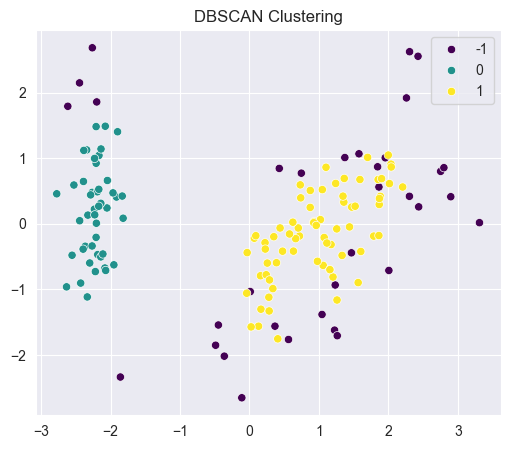

In [69]:
# Plot DBSCAN clusters
plt.figure(figsize=(6, 5))
sns.scatterplot(x=iris_pca[:, 0], y=iris_pca[:, 1], hue=dbscan_labels, palette='viridis', legend='full')
plt.title('DBSCAN Clustering')
plt.show()